# TSF Grip Task 

# Task 1 : Simple Linear Regression 

by Anish S

## IMPORTING LIBRARIES


Numpy - Numerical Python, It is a Python library used for working with arrays.

Pandas - Pandas provides data structures and functionality to quickly manipulate and analyze data

Matplotlib - Matplotlib can be used for creating plots and charts

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

## Load CSV using Pandas from URL

In [2]:
from pandas import read_csv
url = 'http://bit.ly/w-data'
data = read_csv(url)
print(data.shape)

(25, 2)


In [3]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking Missing values in your Dataset

In [4]:
data.isnull().any()

Hours     False
Scores    False
dtype: bool

## To see is there any missing values through visualization

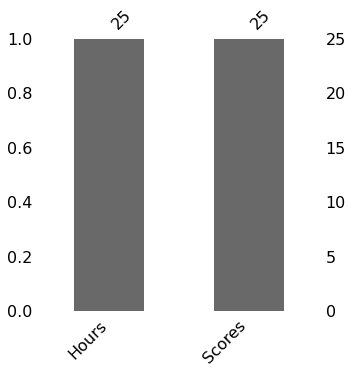

In [5]:
import missingno as mn
mn.bar(data,figsize=(5,5))

So, There is no missing values in our dataset,
Lets go for Exploratory Data Analysis

# Descriptive Statistics

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Correlation between two variables Hours and Score

In [7]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation between the variales Hours and Score is 0.97. So, There is high positive correlation between these variables.

# Visualization

**To check there is a linear relationship between variables exist or not**

Text(0.5, 1.0, 'Hours vs Scores')

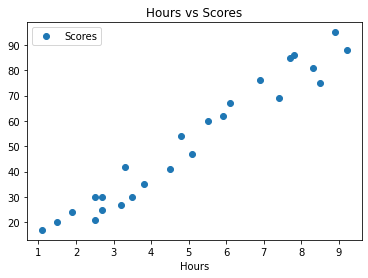

In [8]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')

From the above graph we see that there is a Positive Relationship between variables

In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

## Split the data into test and train data using scikit-learn's built-in function

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Ploting the Regression line

Text(0.5, 1.0, 'Hours vs Score')

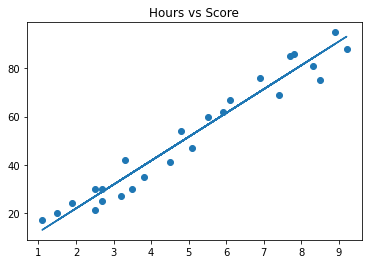

In [12]:
line = regressor.coef_*x+regressor.intercept_  
plt.scatter(x,y)
plt.plot(x,line)
plt.title('Hours vs Score')

In [13]:
Score_predict=regressor.predict(X_test)

In [14]:
Comparison= pd.DataFrame({'Actual_score': y_test, 'predicted_score': Score_predict})
Comparison

,Actual_score,predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
hours= np.array([[9.25]])
hours

array([[9.25]])

In [16]:
own_pred = regressor.predict(hours)
print('No. of hours = {}'.format(hours))
print('Predicted_score = {}'.format(own_pred[0]))

No. of hours = [[9.25]]
Predicted_score = 93.69173248737538


If the student studies for 9.25 hrs/day he will score **93.69 marks**

In [17]:
regressor.score(X_test,y_test)

0.9454906892105356